<a href="https://colab.research.google.com/github/MarwanAshraf22/ai-confluence/blob/main/projects/classical-machine-learning/Sarcasm-Detection-Classical-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sarcasm Detection Using Classical ML Techniques

data : https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection

## Reading and exploring the data :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create the .kaggle directory in the home directory if it doesn't already exist
!mkdir -p ~/.kaggle

# Copy the kaggle.json file (which contains your Kaggle API credentials) to the .kaggle directory
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection

Dataset URL: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
License(s): Attribution 4.0 International (CC BY 4.0)
news-headlines-dataset-for-sarcasm-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile

# Open the zip file located at the specified path in read mode
zip_ref = zipfile.ZipFile('/content/news-headlines-dataset-for-sarcasm-detection.zip', 'r')

# Extract all contents of the zip file into the specified directory
zip_ref.extractall('/content')

# Close the zip file to free up resources
zip_ref.close()

In [4]:
df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json',lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [6]:
df.shape

(28619, 3)

In [7]:
df.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [8]:
# Count the number of duplicate headlines in the 'headline' column
df.headline.duplicated().sum()

116

In [9]:
# Remove rows with duplicate headlines from the DataFrame
df = df.drop(df[df.headline.duplicated()].index, axis=0)

<ipython-input-10-6c0bfd32a7fc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


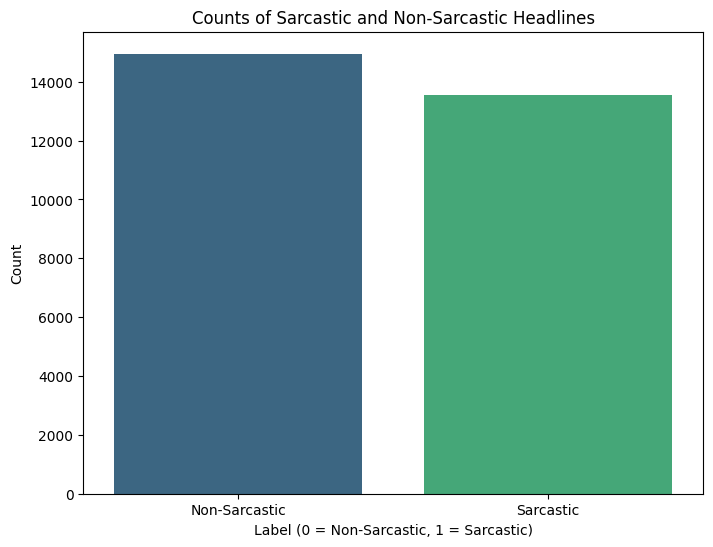

In [10]:
# Plot a bar chart of the counts of sarcastic and non-sarcastic labels
value_counts = df.is_sarcastic.value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.title('Counts of Sarcastic and Non-Sarcastic Headlines')
plt.xlabel('Label (0 = Non-Sarcastic, 1 = Sarcastic)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Sarcastic', 'Sarcastic'])
plt.show()

## Data Preprocessing

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize

# Download the stopwords and punkt tokenizer from NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

def data_preprocessing(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove non-alphabetic characters and replace them with spaces
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Tokenize the text into words
    text = word_tokenize(text)

    # Lemmatize each word and remove stopwords
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]

    # Join the processed words back into a single string
    return ' '.join(text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Training and Evaluation

In [12]:
from sklearn.model_selection import train_test_split

# Define the feature set (headlines) and the target variable (sarcasm labels)
X = df.headline
y = df.is_sarcastic

# Split the data into training and testing sets with 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Function to vectorize the training and testing data using TF-IDF
def vectorize_data(X_train, X_test):
    vectorizer = TfidfVectorizer()  # Initialize TF-IDF vectorizer with a max feature limit
    X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit and transform the training data
    X_test_tfidf = vectorizer.transform(X_test)  # Transform the testing data
    return X_train_tfidf, X_test_tfidf

# Function to train a model and evaluate its performance
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)  # Train the model on the training data
    y_pred = model.predict(X_test)  # Predict the labels for the testing data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
    conf_matrix = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix
    return accuracy, conf_matrix

# Main function to vectorize data, train models, and display results
def main(X_train, y_train, X_test, y_test):
    X_train_tfidf, X_test_tfidf = vectorize_data(X_train, X_test)  # Vectorize the data

    results = []  # List to store results
    confusion_matrices = {}  # Dictionary to store confusion matrices

    # Logistic Regression
    lr_model = LogisticRegression()  # Initialize Logistic Regression model
    accuracy_lr, conf_matrix_lr = train_and_evaluate_model(lr_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
    results.append(['Logistic Regression', accuracy_lr])  # Append accuracy to results
    confusion_matrices['Logistic Regression'] = conf_matrix_lr  # Store confusion matrix

    # Support Vector Machine
    svm_model = SVC(kernel='linear')  # Initialize SVM model with linear kernel
    accuracy_svm, conf_matrix_svm = train_and_evaluate_model(svm_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
    results.append(['Support Vector Machine', accuracy_svm])  # Append accuracy to results
    confusion_matrices['Support Vector Machine'] = conf_matrix_svm  # Store confusion matrix

    # Multinomial Naive Bayes
    nb_model = MultinomialNB()  # Initialize Multinomial Naive Bayes model
    accuracy_nb, conf_matrix_nb = train_and_evaluate_model(nb_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
    results.append(['Multinomial Naive Bayes', accuracy_nb])  # Append accuracy to results
    confusion_matrices['Multinomial Naive Bayes'] = conf_matrix_nb  # Store confusion matrix

    # Display the results in a table
    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
    print(results_df)

    return confusion_matrices

confusion_matrices = main(X_train, y_train, X_test, y_test)  # Call the main function and store confusion matrices

                     Model  Accuracy
0      Logistic Regression  0.834405
1   Support Vector Machine  0.838849
2  Multinomial Naive Bayes  0.834171


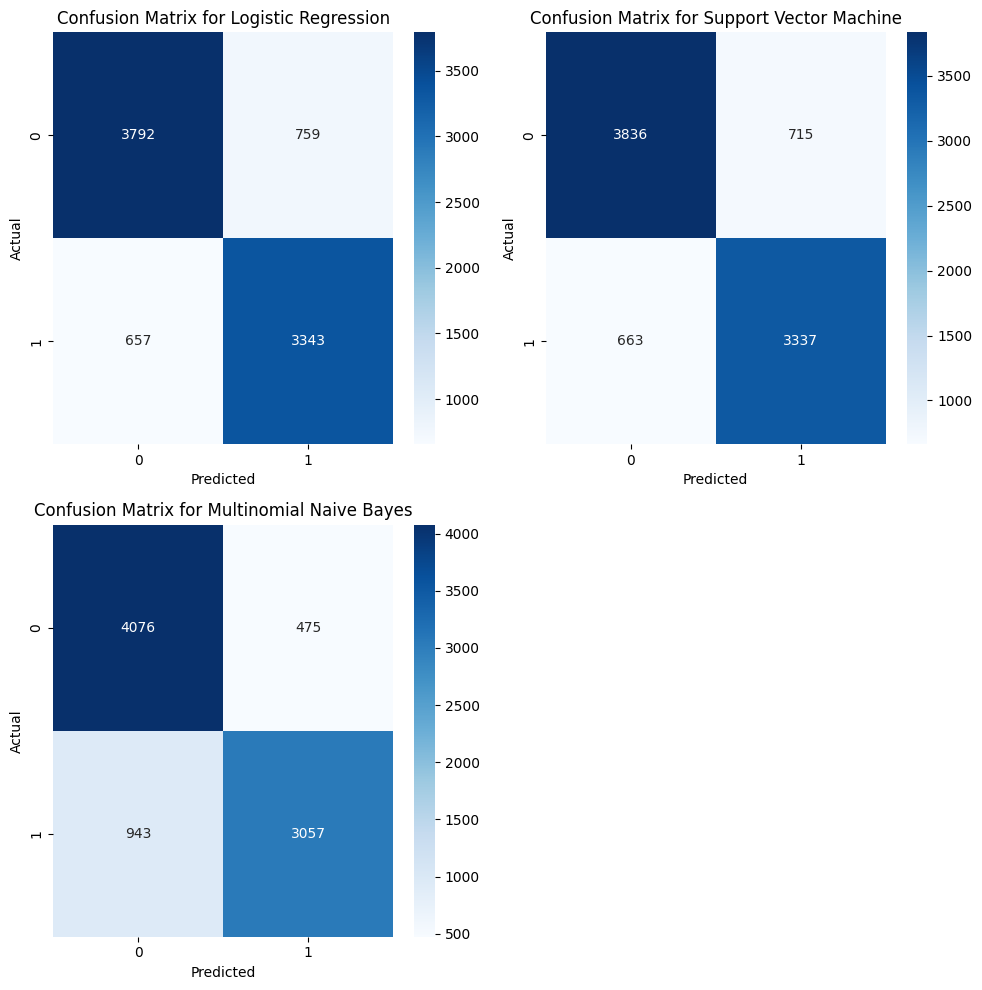

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrices for each model
def plot_confusion_matrices(confusion_matrices):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Create a 2x2 grid of subplots
    model_names = list(confusion_matrices.keys())  # Get the model names from the dictionary keys

    # Iterate over the axes and model names
    for ax, model_name in zip(axes.flat, model_names):
        # Plot the confusion matrix as a heatmap for each model
        sns.heatmap(confusion_matrices[model_name], annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(f'Confusion Matrix for {model_name}')  # Set the title for each subplot
        ax.set_xlabel('Predicted')  # Set the x-axis label
        ax.set_ylabel('Actual')  # Set the y-axis label

    # Hide any empty subplots if there are fewer than 4 models
    for ax in axes.flat[len(model_names):]:
        ax.set_visible(False)

    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()  # Display the plot

plot_confusion_matrices(confusion_matrices)  # Call the function to plot confusion matrices
